In [88]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 200 

In [5]:
df = pd.read_csv("C:\\Users\\Akram siddiqui\\documents\\ExcelR\\Data science assignments\\Basic stats - 1\\sales_data_with_discounts.csv")
df                      

NameError: name 'pd' is not defined

In [46]:
df['City'].nunique()

1

In [48]:
df.dtypes

Date                  object
Day                   object
SKU                   object
City                  object
Volume                 int64
BU                    object
Brand                 object
Model                 object
Avg Price              int64
Total Sales Value      int64
Discount Rate (%)    float64
Discount Amount      float64
Net Sales Value      float64
dtype: object

In [50]:
df.drop(columns = ['Date','Day','City'], inplace = True)

In [52]:
df

,SKU,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,M01,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,M02,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,M03,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,M04,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,M05,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...
445,L06,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,L07,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,L08,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,L09,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


In [54]:
df.describe()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


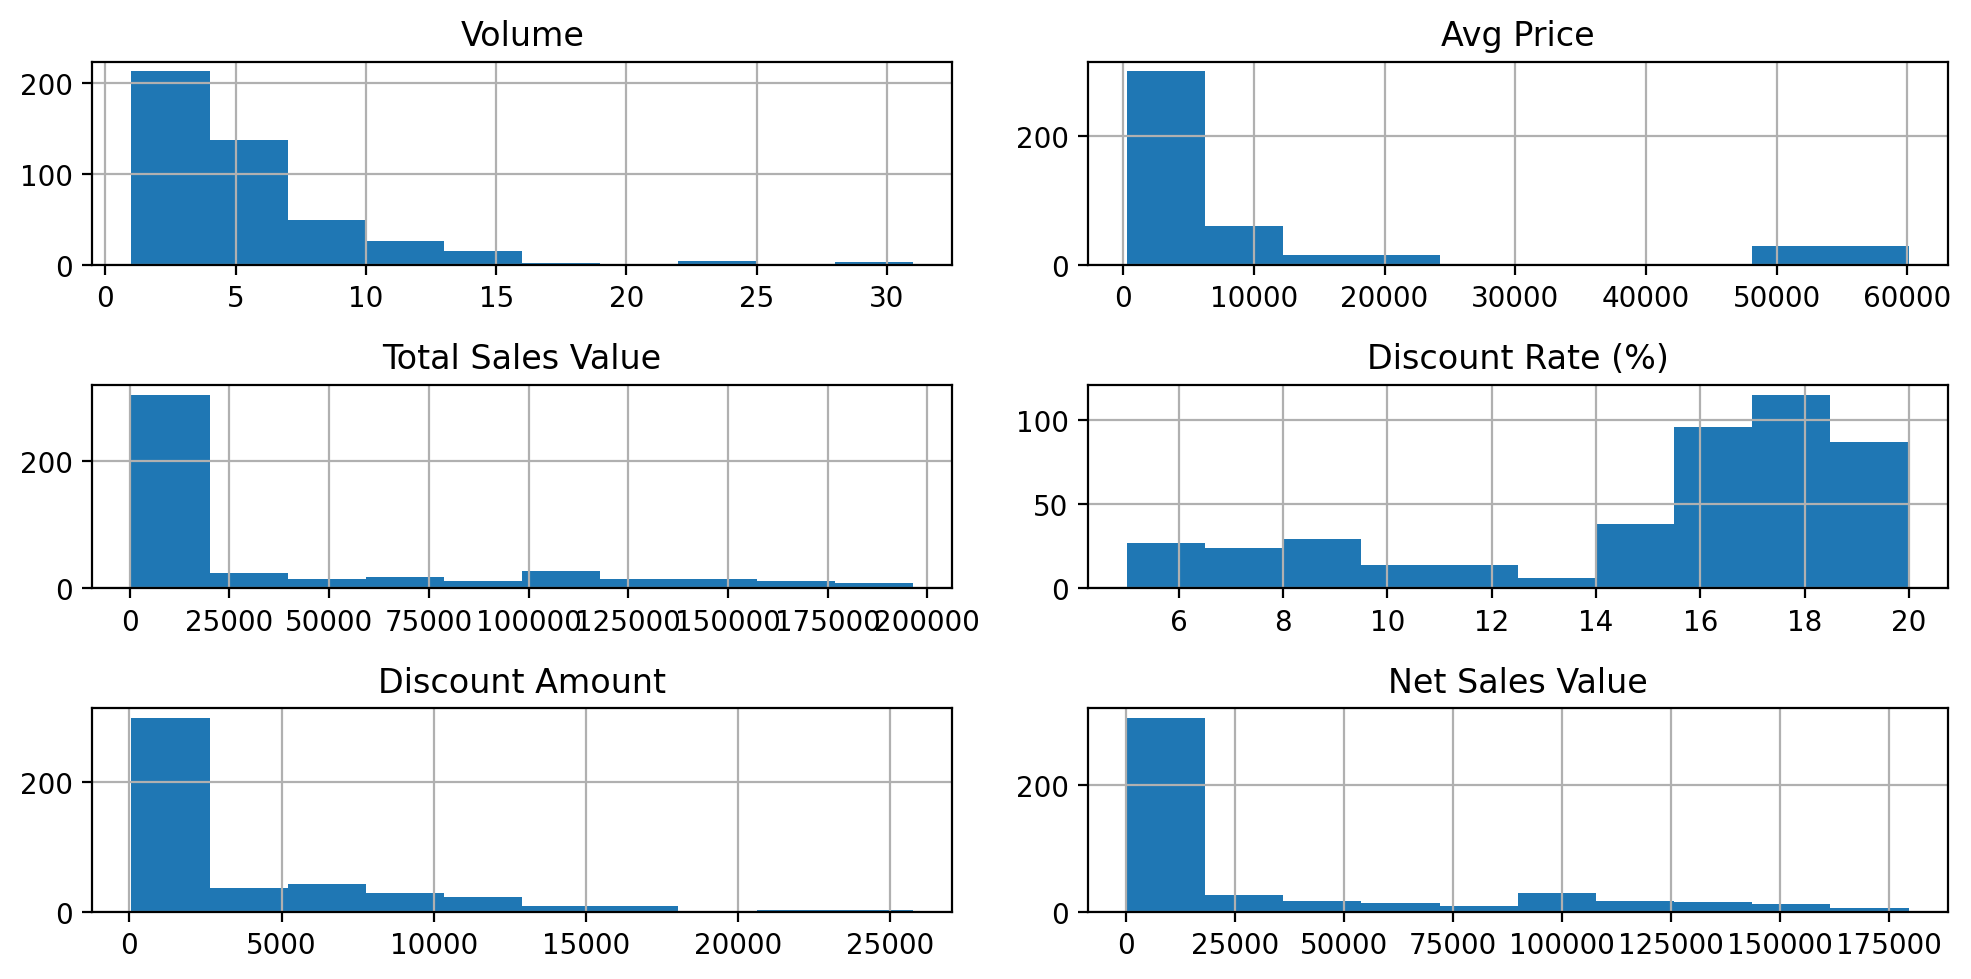

In [90]:
df.hist()
plt.tight_layout()

<Axes: >

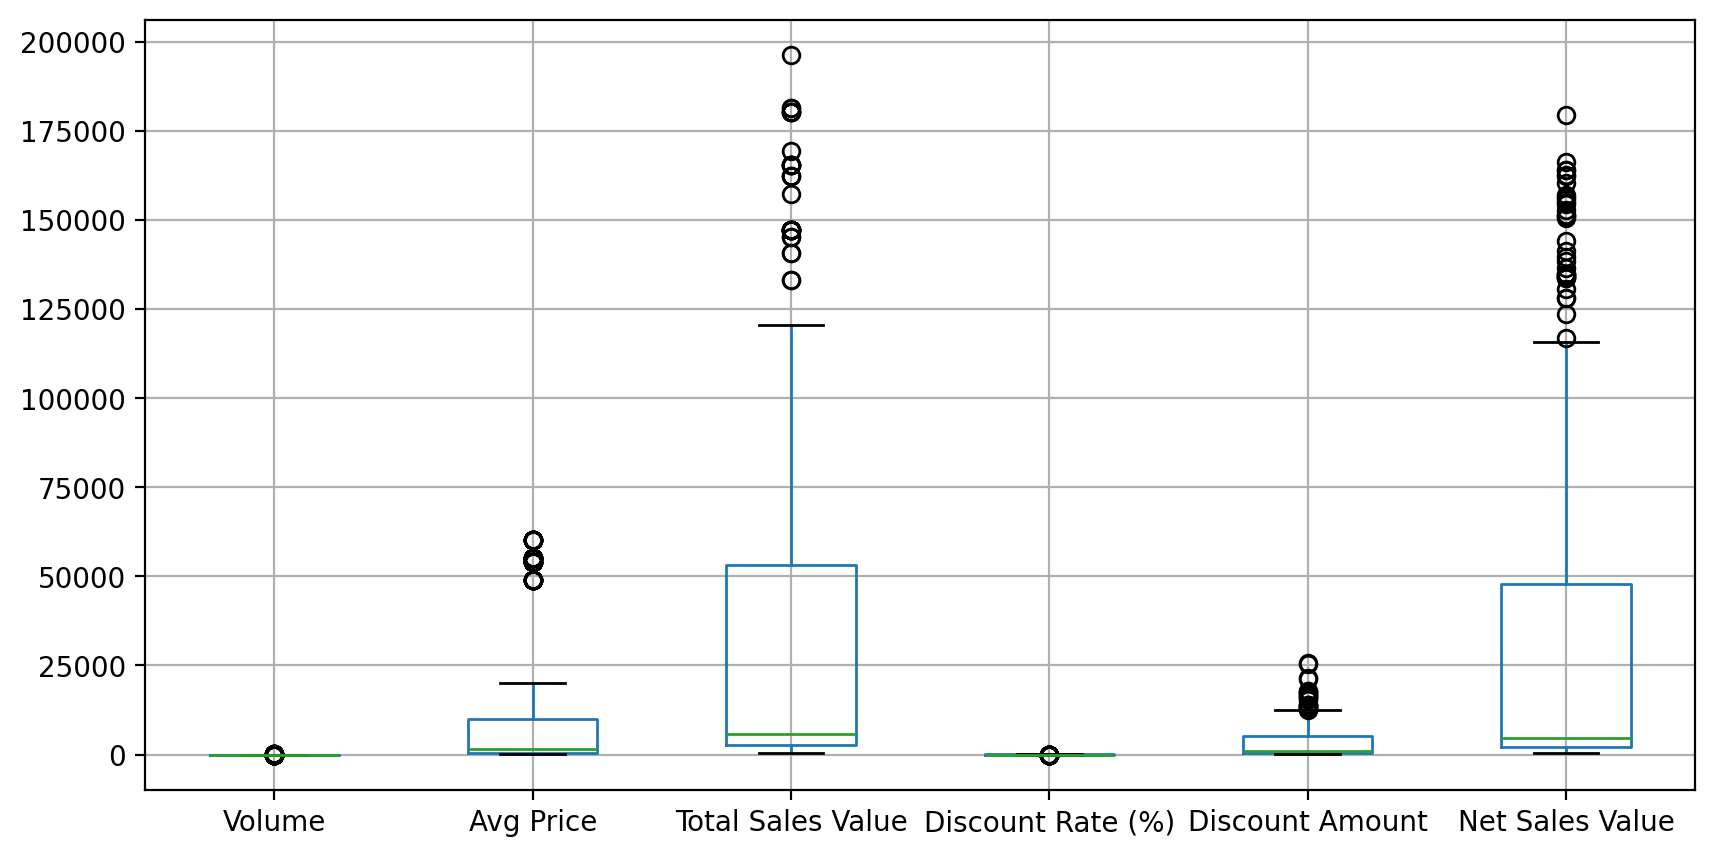

In [92]:
df.boxplot()

<Axes: >

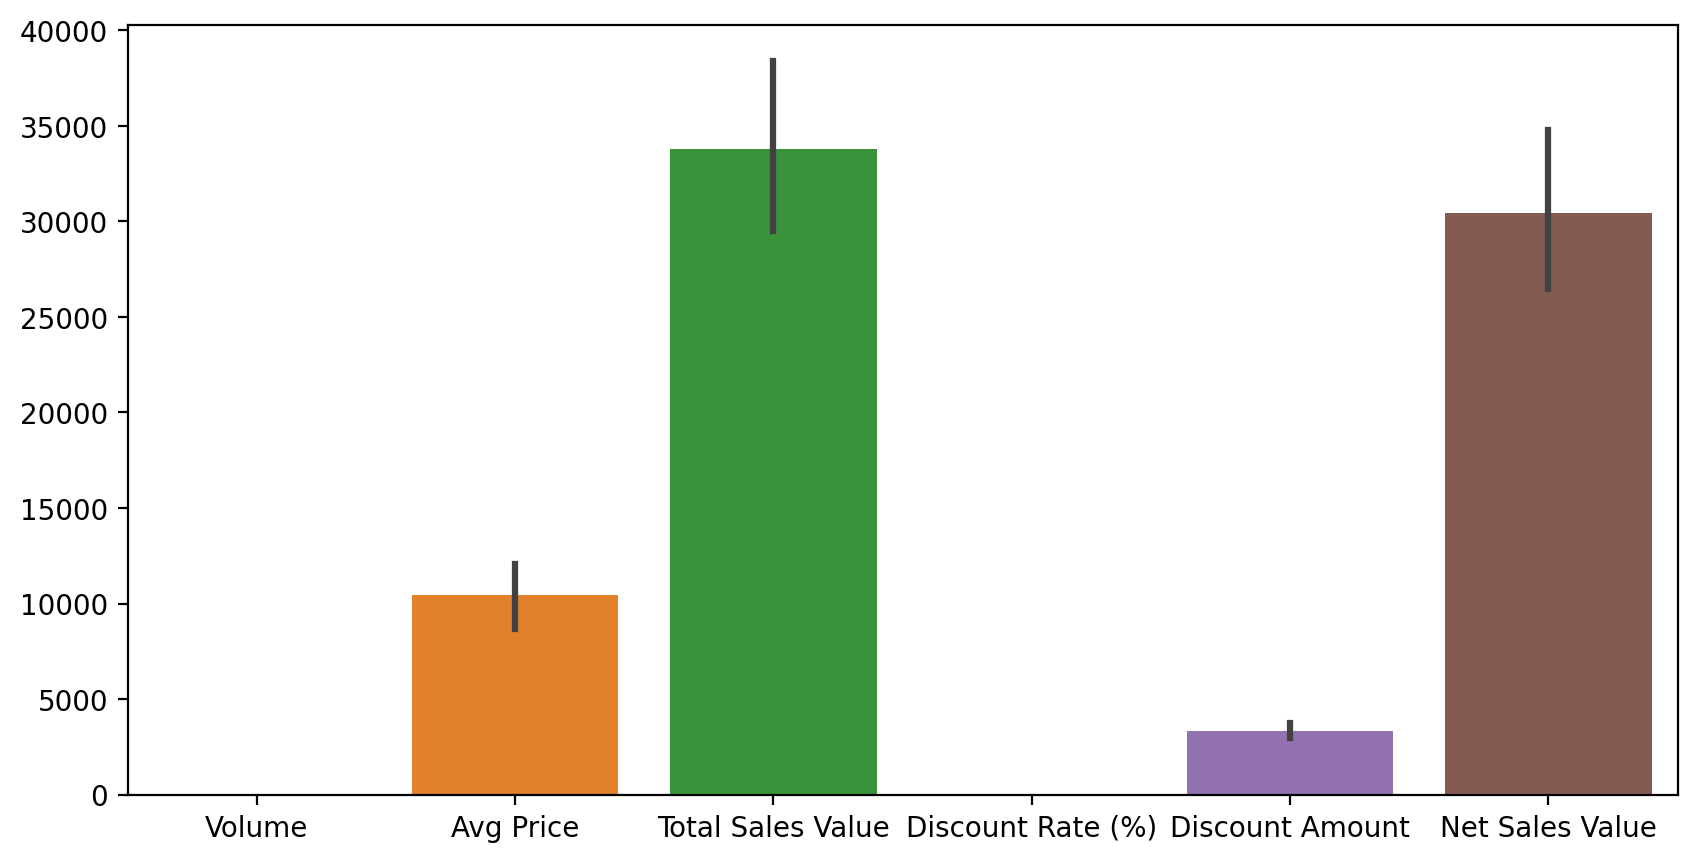

In [94]:
sns.barplot(df)

In [96]:
from sklearn.preprocessing import StandardScaler

In [98]:
sc = StandardScaler()

In [100]:
numerical_columns = [
    "Volume",
    "Avg Price",
    "Total Sales Value",
    "Discount Rate (%)",
    "Discount Amount",
    "Net Sales Value",
]

In [102]:
df_standardized = df.copy()
df_standardized[numerical_columns] = sc.fit_transform(df[numerical_columns])

In [104]:
print("Standardized Data:")
display(df_standardized.head())

Standardized Data:


,SKU,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,M01,2.350029,Mobiles,RealU,RU-10,0.091173,2.925721,-0.830289,3.952816,2.804756
1,M02,1.167129,Mobiles,RealU,RU-9 Plus,-0.019570,1.330995,-0.852661,1.849014,1.271026
2,M03,0.457388,Mobiles,YouM,YM-99,0.312659,1.562775,-1.351631,1.622995,1.545675
3,M04,0.220808,Mobiles,YouM,YM-99 Plus,0.534146,1.719276,-1.949723,1.113807,1.765810
4,M05,-0.488932,Mobiles,YouM,YM-98,-0.130313,-0.188452,0.673739,0.227852,-0.227595


In [106]:
categorical_columns = ["SKU","Brand","Model","BU"]
df_encoded = pd.get_dummies(df_standardized, columns=categorical_columns, drop_first=True,dtype = int)
df_encoded

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,SKU_F02,SKU_F03,SKU_F04,SKU_F05,...,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus,BU_Lifestyle,BU_Mobiles
0,2.350029,0.091173,2.925721,-0.830289,3.952816,2.804756,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1.167129,-0.019570,1.330995,-0.852661,1.849014,1.271026,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.457388,0.312659,1.562775,-1.351631,1.622995,1.545675,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0.220808,0.534146,1.719276,-1.949723,1.113807,1.765810,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,-0.488932,-0.130313,-0.188452,0.673739,0.227852,-0.227595,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,-0.725512,-0.506840,-0.618334,0.076009,-0.653541,-0.610461,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
446,0.220808,-0.434857,-0.360801,0.451097,-0.152191,-0.378500,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
447,-0.725512,-0.490229,-0.606448,0.903793,-0.608140,-0.601921,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
448,-0.488932,-0.473617,-0.556923,0.388474,-0.530379,-0.555499,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
